In [56]:
import sys, os
import pickle
import pysam
from random import choice
cprint = lambda x: pprint(x, compact=True)
from tqdm import tqdm, trange
from collections import defaultdict 
import numpy as np

import matplotlib.pyplot as plt

import numpy as np


import otbor

from importlib import reload

In [3]:
! bcftools view -S MEX.full.txt /media/scglab/T7/Work/data/1000GP/22/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz -Oz -o mex.vcf.gz

The preset string not recognised: 'mex.vcf.gz'


In [4]:
! tabix -p vcf mex.vcf.gz

In [5]:
! bcftools view -S IBS.txt /media/scglab/T7/Work/data/1000GP/22/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz -Oz -o ibs.vcf.gz
! tabix -p vcf ibs.vcf.gz

In [62]:
samples_mex, dict_mex_neand_tracts = otbor.neand_al_freq('./MEX.full.txt', 
                                                                      'mex.vcf.gz', 
                                                                      'mex.out.neand.eu.txt', 
                                                                      '22')

In [61]:
reload(otbor)
samples_IBS, dict_IBS_neand_tracts = otbor.neand_al_freq('IBS.txt', 'ibs.vcf.gz', 
                                                                      'ibs.noEM.chr22.txt', '22')

In [63]:
def all_set_trcts(dct):
    lst_tr=[]
    for j in dct.values():
        if j[0]!=[]:
            lst_tr.append(j[0])
        if j[1]!=[]:
            lst_tr.append(j[1])
    
    return lst_tr

lst_ibs = all_set_trcts(dict_IBS_neand_tracts)
lst_mex = all_set_trcts(dict_mex_neand_tracts)    

In [52]:
st=16054713
dict_inter_mex={}
dict_inter_IBS={}


for i in range(35133):
    x=[[st+1000*i, st+1000*(i+1)]]
    n=0
    for j in lst_mex:
        
        if otbor.intersections(x, j):
            n+=1
    dict_inter_mex[str(x[0])]=n/128

    n1=0
    for j in lst_ibs:
        
        if otbor.intersections(x, j):
            n1+=1
    dict_inter_IBS[str(x[0])]=n1*0.45/214


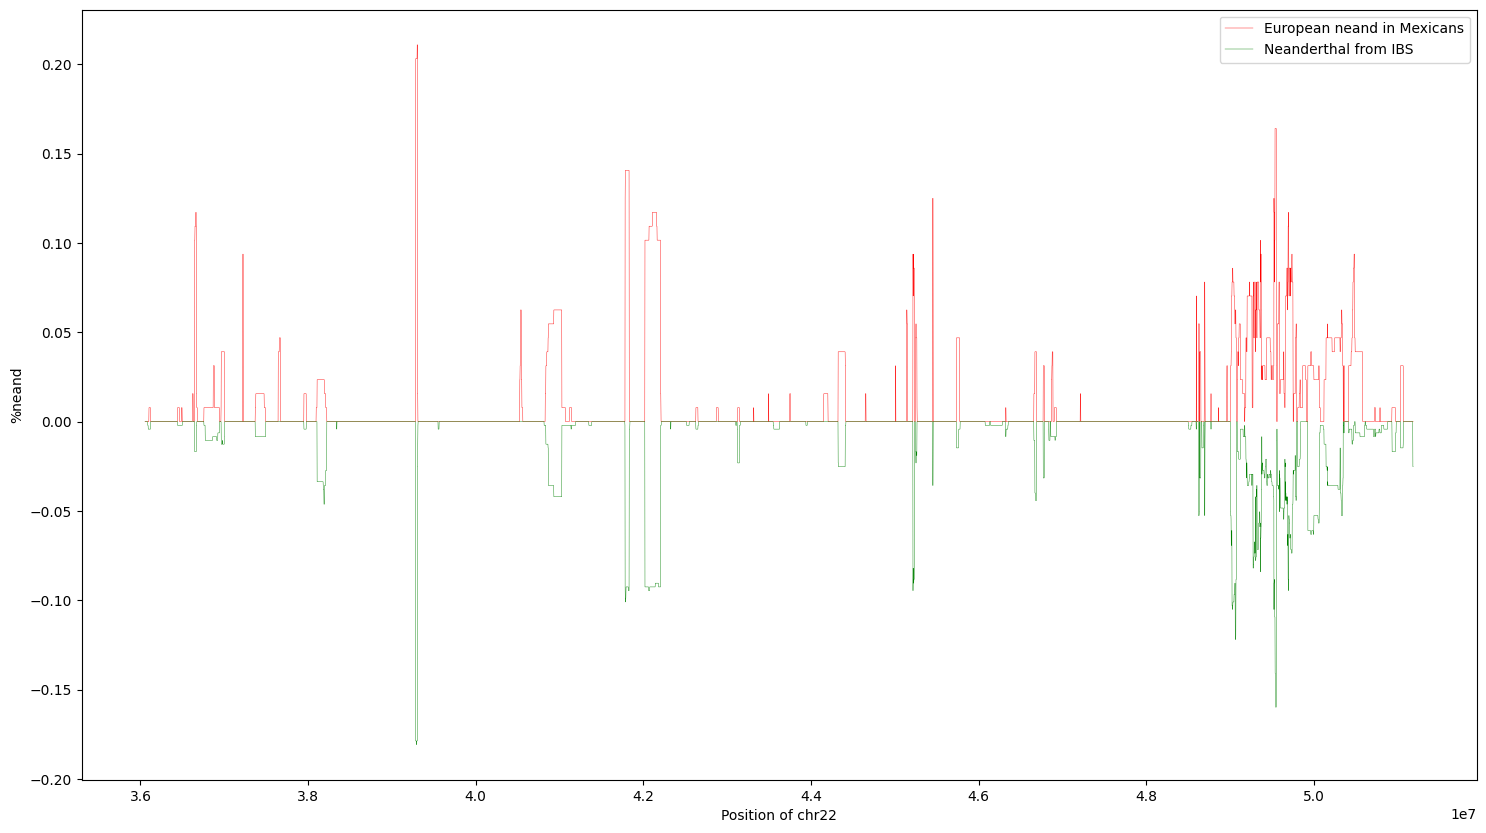

In [64]:
fig, ax = plt.subplots(1, figsize=(18, 10))
x=[st+1000*i for i in range(35133)]
y1=np.array([dict_inter_mex[str([x[i], x[i]+1000])] for i in range(len(x))])
y2=np.array([dict_inter_IBS[str([x[i], x[i]+1000])] for i in range(len(x))])
ax.plot(x[20000:],y1[20000:],color='r', linewidth=0.3, label='European neand in Mexicans')
ax.plot(x[20000:],-y2[20000:],color='g', linewidth=0.3, label='Neanderthal from IBS')
plt.legend()
ax.set_xlabel("Position of chr22")
ax.set_ylabel("%neand")
plt.savefig('Otbor.png')